# Pemrograman Python

## Tugas 4: Klasifikasi Gambar

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi tugas4_NIM.ipynb.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Terdapat enam _packages_ yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- keras
- matplotlib
- numpy
- pandas
- scipy
- seaborn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda. Untuk kode yang Anda ambil dari sumber lain, **cantumkan URL menuju referensi tersebut jika diambil dari internet**!

Perhatikan poin untuk tiap soal! **Semakin kecil poinnya, berarti kode yang diperlukan untuk menjawab soal tersebut seharusnya semakin sedikit!**

Dalam tugas ini, Anda mungkin perlu mengetahui bagaimna cara melakukan **masking** dalam NumPy. Untuk itu, Anda bisa melihat referensinya di [sini](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.06-Boolean-Arrays-and-Masks.ipynb).

**NIM:0102514015**

**Nilai akhir: XX/100**

### Deskripsi Dataset

Pada tugas kali ini, Anda akan mencoba membuat mesin untuk mengklasifikasikan gambar. Terdapat dua jenis gambar: angka dan hewan. Dataset angka akan menggunakan [MNIST](http://yann.lecun.com/exdb/mnist/), salah satu dataset standar untuk pengolahan gambar yang sederhana. Anda akan mencoba mengklasifikasikan apakah suatu gambar berukuran 28 x 28 pixels yang menunjukkan angka 0-9.

Dataset hewan merupakan hasil "gambar tangan" beberapa orang melalui internet. Dataset untuk tugas ini diambil dari [The Quick Draw Dataset](https://github.com/googlecreativelab/quickdraw-dataset) yang dikumpulkan oleh Google. Dataset ini terdiri dari 50 juta gambar yang terdiri dari 345 kategori.

Untuk menyederhanakan tugas Anda, meski Anda akan memakai keseluruhan data MNIST, hanya subset dari dataset hewan yang diambil, yaitu sejumlah gambar dari 4 kategori hewan: **cat**, **crab**, **dog**, dan **dolphin**. Anda akan mengeksplorasi beberapa algoritma pembelajaran mesin yang dapat digunakan untuk mengklasifikasi gambar-gambar tersebut. Selain itu, Anda juga akan membuat beberapa visualisasi dari beberapa sampel gambar dalam dataset.

### Mengimpor Modul dan Dataset

In [8]:
from __future__ import print_function, division # Gunakan print(...) dan bukan print ...
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from mpl_toolkits.axes_grid1 import AxesGrid
from collections import Counter
%matplotlib inline

RANDOM_STATE = 1337
np.random.seed(RANDOM_STATE)

In [2]:
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


## 1. Eksplorasi Awal Data - MNIST (25 poin)

### Soal 1.1.a (3 poin)

Berapa jumlah gambar dalam `X_train`? Berapa jumlah gambar dalam `X_test`?

*Catatan: Ingat, jumlah data $\sim$ jumlah baris!*

In [8]:
print ("X_Train : ", X_train.shape[0],"\nX_test :", X_test.shape[0])

X_Train :  60000 
X_test : 10000


### Soal 1.1.b (2 poin)

Tunjukkan dimensi dari satu gambar dalam dataset tersebut!

In [9]:
X_train.shape[1:3]

(28, 28)

### Soal 1.2 (7 poin)

Tampilkan 5 gambar sampel dari masing-masing kelas dalam `X_train` secara acak, lalu buatlah dalam bentuk grid berukuran 10 x 5!

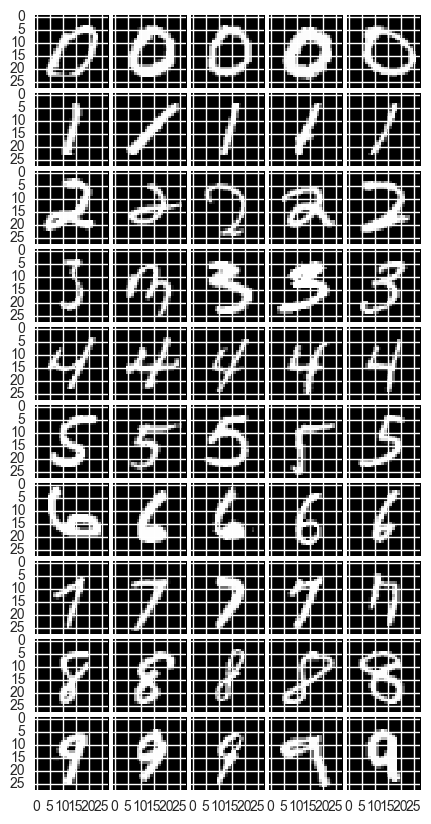

In [30]:


F = plt.figure(1,(50,10))
F.subplots_adjust(left=0.05, right=0.95)
grid = AxesGrid(F, 141, nrows_ncols=(10,5), axes_pad=0.05, label_mode="L")
ind=0
for j in range(10):
    for i in range(5):
        a = X_train[y_train==j]
        index = random.randint(0,len(a))
        image = a[index]
        im=grid[ind].imshow(image, interpolation="nearest", cmap="gray")
        ind+=1
plt.draw()
plt.show()

### Soal 1.3.a (6 poin)

Gambarkan histogram nilai pixel di posisi (0,0), i.e. pojok kiri atas, dan (15,15) dari data `X_train` dalam dua plot yang berbeda. Batasi sumbu x untuk bernilai $x \in [0, 1]$. Bagi nilai tiap pixel dengan 255.0 terlebih dahulu.

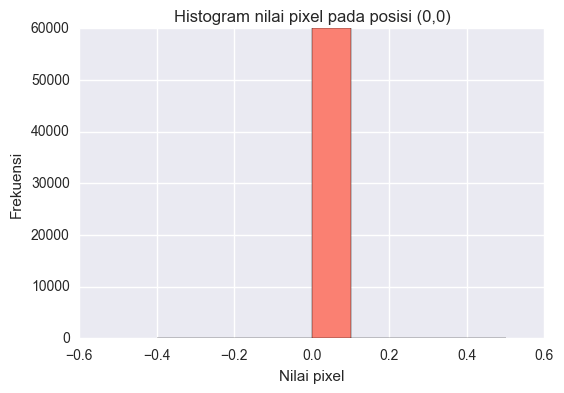

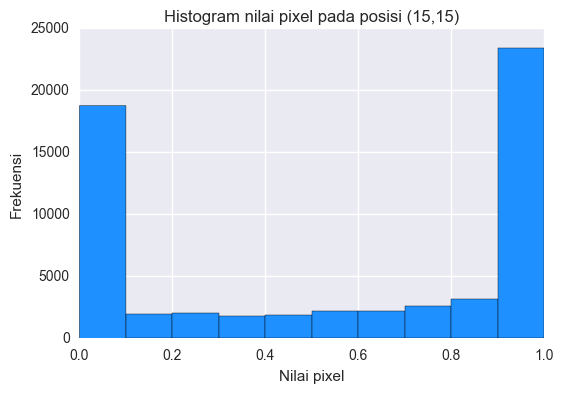

In [31]:
plt.hist(X_train[:,0,0]/255.0, color="salmon")
plt.xlabel('Nilai pixel')
plt.ylabel('Frekuensi')
plt.title('Histogram nilai pixel pada posisi (0,0)')
plt.show()
plt.hist(X_train[:,15,15]/255.0, color="dodgerblue")
plt.xlabel('Nilai pixel')
plt.ylabel('Frekuensi')
plt.title('Histogram nilai pixel pada posisi (15,15)')
plt.show()

### Soal 1.3.b (2 poin)

Apa yang dapat Anda simpulkan dari kedua histogram tersebut?

*Terlihat pada histogram yang pertama, yaitu nilai pixel pada posisi (0,0) seluruhnya adalah 0 yang berarti atribut/ pixel yang berada pada posisi (0,0) tidak memiliki pengaruh apapun. Sedangkan pada histogram yang kedua, telah memiliki nilai yang beragam walaupun nilai 0 masih cukup banyak. Tetapi nilai 1 nya lebih banyak. *

### Soal 1.4 (5 poin)

Berapa jumlah data untuk masing-masing kelas dalam data latih dan data uji? Tunjukkan juga dalam diagram batang untuk mendapatkan nilai penuh!

*Petunjuk: Anda dapat memanfaatkan salah satu modul dalam paket `collections`!*

In [32]:

labels_train = Counter(label for label in y_train)
labels_test = Counter(label for label in y_test)
print(labels_test)

Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})


## 2. Klasifikasi MNIST dengan Regresi Logistik (20 poin)

### Soal 2.1 (2 poin)

Reshape `X_train` dan `X_test` ke dalam dimensi $n \times 784$! Jangan lupa untuk membagi nilainya dengan 255.0 jika di pertanyaan sebelumnya tidak Anda simpan hasil pembagiannya.

In [33]:
X_train = X_train/255.0
X_test = X_test/255.0

n_pixels = X_train.shape[1]*X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], n_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], n_pixels).astype('float32')
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

### Soal 2.2 (5 poin)

Dengan regresi logistik (`LogisticRegression`), klasifikasikan `X_test` dari `X_train` dengan mengatur `random_state`-nya terlebih dahulu, laporkan akurasinya dan gambarkan *heatmap* dari *confusion matrix*-nya! Jangan lupa untuk memberikan label untuk amsing-masing sumbunya dan mengantoasi tiap kotak pada *heatmap*!

Pada proses pelatihan model (`clf.fit()`), tambahkan `%timeit -n1` pada baris yang sama sehingga menjadi `%timeit -n1 clf.fit()`. Ini akan menunjukkan waktu yang dibutuhkan untuk melatih model tersebut.

*Petunjuk: Gunakan fungsi `.fit()` dan `.predict()`. Simpan hasil `.predict()` dalam `y_pred`. Akurasi dapat dihitung dengan `sklearn.metrics.accuracy_score`. Silakan baca dokumentasinya untuk tahu lebih lengkap cara pemakaiannya. Anda juga dapat melihat contoh kode di [sini](https://github.com/aliakbars/uai-python/blob/master/scripts/week10/knn.py) pada baris 35-37.*

In [34]:
clf = LogisticRegression(random_state=RANDOM_STATE)
%timeit -n1 clf.fit(X_train, y_train)

1 loop, best of 3: 3min 17s per loop


Akurasi :  0.9201


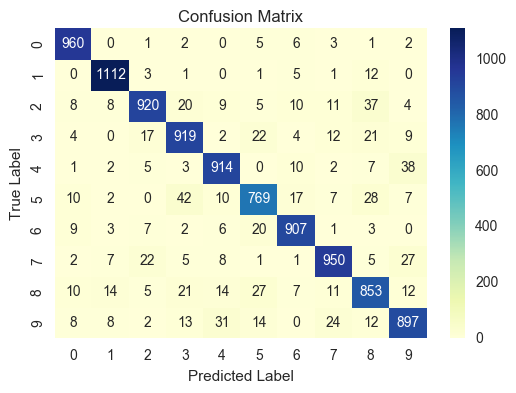

In [35]:
y_pred = clf.predict(X_test)
#print(y_pred)
print("Akurasi : ", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
#print(cm)

ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #-___-
ax.set_title('Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()

### Soal 2.3 (5 poin)

Perhatikan bahwa dibutuhkan waktu yang cukup lama untuk melatih model dengan regresi logistik. Kita akan mencoba mempercepat ini dan mencari komponen pentingnya dengan *Principal Component Analysis* (PCA). Ambil dimensi yang menjelaskan 90% variansinya (lihat dokumentasi [`PCA`]()), lalu transformasikan bentuk `X_train` dan `X_test`. Kemudian, latih kembali regresi logistik dengan kode seperti yang telah Anda buat di soal 2.2 dan prediksi label `X_test`! Catat waktu yang dibutuhkan untuk proses transformasi `X_train` dengan PCA dan saat melatih model regresi logistik dengan `%timeit -n1`. Apakah Anda menemukan perbedaan waktu dan akurasi dengan soal 2.2?

*Petunjuk: Atur nilai `n_components` pada saat instansiasi `PCA`. Gunakan `.fit()` dan `.transform()` dari modul `PCA` dan baca dokumentasinya untuk tahu lebih lengkap cara pemakaiannya!*

1 loop, best of 3: 1.54 s per loop


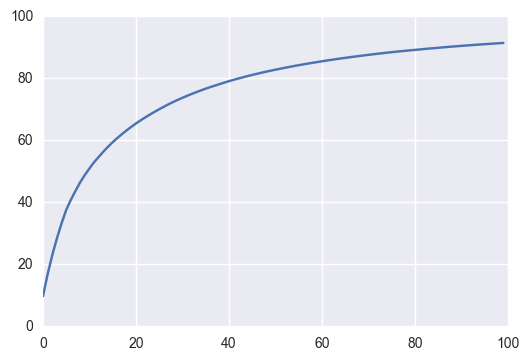

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, random_state=RANDOM_STATE)
pca.fit(X_train)
var = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
plt.plot(var)

#n_components yang variansnya 90 adalah sekitar 80 ya pak, ya?
pca = PCA(n_components=80, random_state=RANDOM_STATE)
pca.fit(X_train)
%timeit -n1 pca.transform(X_train)
X_train_pca =  pca.transform(X_train)
X_test_pca = pca.transform(X_test)
#X_train_pca.shape

In [37]:
clf_pca = LogisticRegression(random_state=RANDOM_STATE)
%timeit -n1 clf_pca.fit(X_train_pca, y_train)

1 loop, best of 3: 1min 12s per loop


In [38]:
y_pred_pca = clf_pca.predict(X_test_pca)
print("Akurasi : ", accuracy_score(y_test, y_pred_pca))
#print(y_pred)

Akurasi :  0.9128


*Dengan menggunakan PCA variansi 90% (jumlah komponen = 80), waktu yang dibutuhkan untuk fitting jauh lebih cepat, berkurang hingga 70% dari waktu awal tanpa menggunakan PCA. Akurasinya juga hanya berkurang sebanyak 0.0073.*

### Soal 2.4.a (5 poin)

Lakukan PCA kembali untuk menghasilkan 2 komponen prinsipil saja dari `X_train`. Lalu, visualisasikan hasil transformasi tersebut dalam *scatter plot* yang dibedakan warnanya berdasarkan kelas dalam `y_train`!

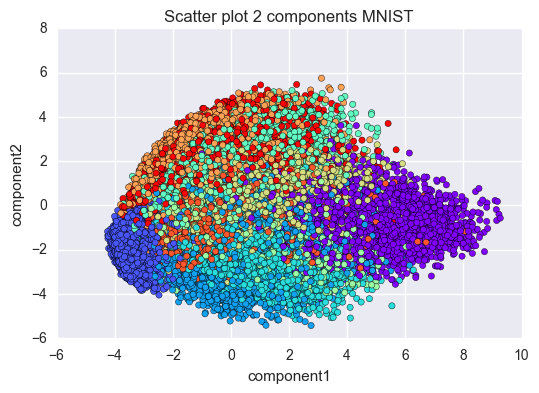

In [39]:
pca2 = PCA(n_components=2, random_state=RANDOM_STATE)
pca2.fit(X_train)
X_train_pca2 =  pca2.transform(X_train)

fig, plot = plt.subplots()
#plt.prism()
plot.scatter(X_train_pca2[:,0],X_train_pca2[:,1], c=y_train, cmap=plt.cm.rainbow)
#plot.set_xticks(())
#plot.set_yticks(())
plot.set_xlabel('component1')
plot.set_ylabel('component2')
plot.set_title('Scatter plot 2 components MNIST')
plt.show()

### Soal 2.4.b (3 poin)

Lakukan hal yang serupa seperti pada soal 2.4.a, tetapi kali ini pilih 3 komponen prinsipil, lalu visualisasikan dalam *scatter plot* 3 dimensi!

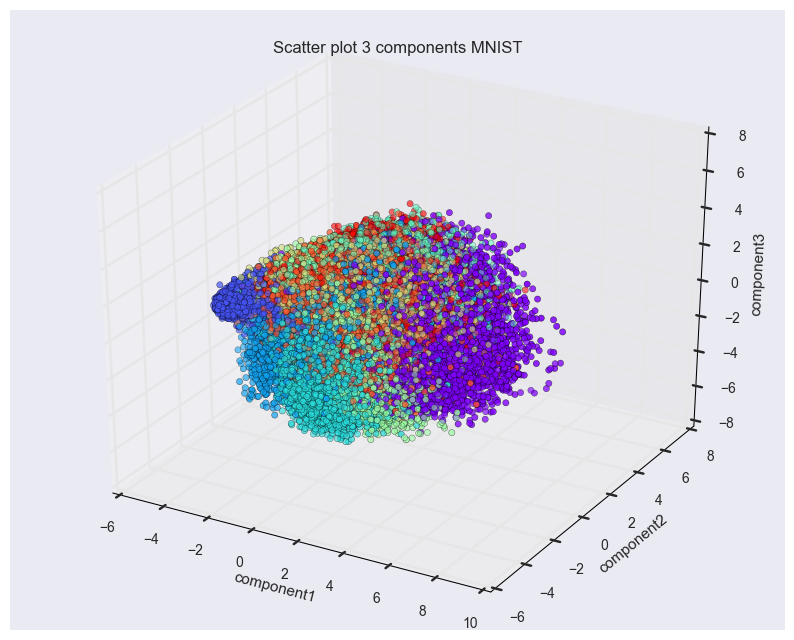

In [40]:
pca3 = PCA(n_components=3, random_state=RANDOM_STATE)
pca3.fit(X_train)
X_train_pca3 =  pca3.transform(X_train)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_train_pca3[:,0],X_train_pca3[:,1],X_train_pca3[:,2],c=y_train, cmap=plt.cm.rainbow)
#ax.set_xticks(())
#ax.set_yticks(())
#ax.set_zticks(())
ax.set_xlabel('component1')
ax.set_ylabel('component2')
ax.set_zlabel('component3')
ax.set_title('Scatter plot 3 components MNIST')
plt.show()

## 3. Eksplorasi Awal Data - Quick Draw (20 poin)

### Soal 3.1 (3 poin)

Muat data `quickdraw.npy` ke dalam variabel `X` dan `quickdraw_labels.npy` ke dalam variabel `y`. Tunjukkan berapa jumlah gambar dalam data tersebut dan berapa jumlah pixel-nya!

*Petunjuk: Gunakan fungsi dari modul NumPy untuk memuat data tersebut.*

In [3]:
X = np.load('quickdraw.npy')
y = np.load('quickdraw_labels.npy')

print('Jumlah gambar : ',X.shape[0], 'Jumlah pixel: ', X.shape[1])

Jumlah gambar :  130974 Jumlah pixel:  784


### Soal 3.2 (3 poin)

Bagi data ke dalam `X_train`, `X_test`, `y_train`, `y_test` dengan `sklearn.model_selection.train_test_split`. Pastikan porsi data uji adalah 20000 gambar, dan sisanya adalah data latih. Kemudian, tunjukkan berapa **jumlah gambar untuk masing-masing hewan** di dalam `y_train` dan `y_test`.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=20000,random_state=RANDOM_STATE)
print(X_test.shape)

labels_train = Counter(label for label in y_train)
labels_test = Counter(label for label in y_test)
print(labels_train,'\n',labels_test)

(20000, 784)
Counter({b'dog': 32160, b'crab': 26893, b'cat': 26106, b'dolphin': 25815}) 
 Counter({b'dog': 5879, b'crab': 4839, b'cat': 4694, b'dolphin': 4588})


### Soal 3.3 (5 poin)

Tampilkan 10 gambar sampel dari masing-masing kelas dalam `X_train` **secara acak**, lalu buatlah dalam bentuk grid berukuran 4 x 10!

*Petunjuk: Anda mungkin perlu mengubah dimensi dari `X_train` $n \times d \times d$ dengan $n$ adalah jumlah gambar dan $d$ adalah jumlah pixel dalam baris dan kolom (satu gambar akan berbentuk persegi).*

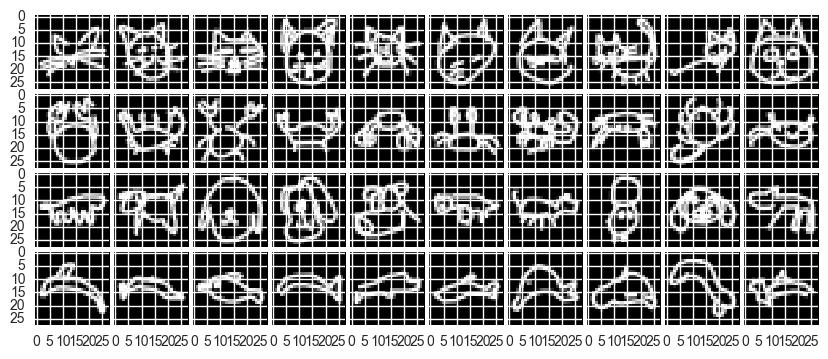

In [9]:

X_train = X_train.reshape(X_train.shape[0], 28, 28)
y_train = y_train.astype(str)

F = plt.figure(1,(40,10))
F.subplots_adjust(left=0.05, right=0.95)
grid = AxesGrid(F, 141, nrows_ncols=(4,10), axes_pad=0.05, label_mode="L")
ind=0
for j in ['cat','crab','dog','dolphin']:
    for i in range(10):
        a = X_train[y_train==j]
        index = random.randint(0,len(a))
        image = a[index]
        im=grid[ind].imshow(image, interpolation="nearest", cmap="gray")
        ind+=1
plt.draw()
plt.show()


### Soal 3.4 (5 poin)

Ambil nilai rata-rata untuk masing-masing pixel untuk masing-masing kelas (**cat**, **crab**, **dog**, dan **dolphin**) dalam `X_train`, kemudian tampilkan gambar rata-rata tersebut!

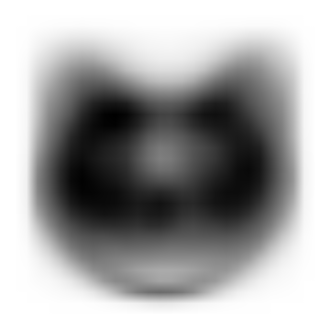

In [115]:
X_train_ = X_train.reshape(X_train.shape[0], 784)

fig = plt.imshow(X_train[y_train=='cat'].mean(axis=0))
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

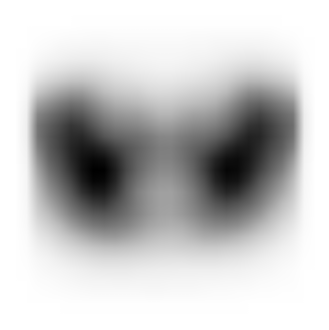

In [116]:
fig = plt.imshow(X_train[y_train=='crab'].mean(axis=0))
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

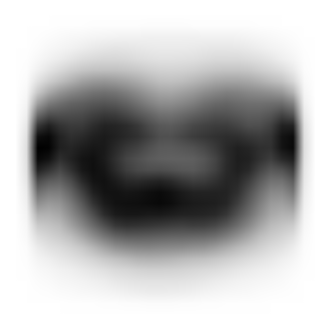

In [117]:
fig = plt.imshow(X_train[y_train=='dog'].mean(axis=0))
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

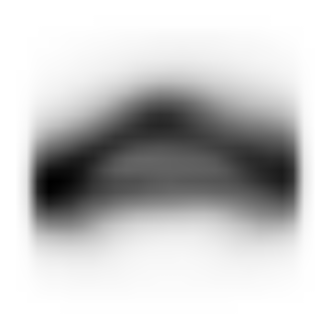

In [118]:
fig = plt.imshow(X_train[y_train=='dolphin'].mean(axis=0))
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

### Soal 3.5 (4 poin)

Bagi dataset tersebut ke dalam dua himpunan variabel: **cat vs dog** dan **crab vs dolphin**.

*Contoh: Hasilnya dapat Anda simpan dalam `X_train_catdog`, `X_test_catdog`, `y_train_catdog`, `y_test_catdog`; dan `X_train_crabdolp`, `X_test_crabdolp`, `y_train_crabdolp`, `y_test_crabdolp`.*

In [156]:
y_test=y_test.astype(str)

X_train_catdog = X_train[np.logical_or(y_train=='cat', y_train=='dog'),:]
y_train_catdog = y_train[np.logical_or(y_train=='cat', y_train=='dog')]

X_test_catdog = X_test[np.logical_or(y_test=='cat', y_test=='dog'),:]
y_test_catdog = y_test[np.logical_or(y_test=='cat', y_test=='dog')]

X_train_crabdolp = X_train[np.logical_or(y_train=='crab', y_train=='dolphin'),:]
y_train_crabdolp = y_train[np.logical_or(y_train=='crab', y_train=='dolphin')]

X_test_crabdolp = X_test[np.logical_or(y_test=='crab', y_test=='dolphin'),:]
y_test_crabdolp = y_test[np.logical_or(y_test=='crab', y_test=='dolphin')]
#print(y_test_catdog.shape)

## 4. Klasifikasi Quick Draw (25 poin)

### Soal 4.1.a (5 poin)

Ubah nilai setiap pixel dalam `X_train` dan `X_test` untuk **cat vs dog** dengan membaginya dengan 255.0. Ganti nilai pada `y_train` dan `y_test` agar `'cat' = 1` dan `'dog' = 0`. Lalu, gunakan regresi logistik untuk mengklasifkasikan gambar-gambar tersebut, laporkan akurasinya, dan gambarkan *heatmap* dari *confusion matrix*-nya.

*Catatan: Normalnya, sumbu y adalah 'true value', sedangkan sumbu x adalah 'predicted value' pada confusion matrix.*

In [157]:
X_train_catdog = X_train_catdog/255.0
X_test_catdog = X_test_catdog/255.0

y_train_catdog[y_train_catdog=='cat']=1
y_train_catdog[y_train_catdog=='dog']=0
y_test_catdog[y_test_catdog=='cat']=1
y_test_catdog[y_test_catdog=='dog']=0
#y_train_catdog

In [489]:
%timeit -n1 clf.fit(X_train_catdog, y_train_catdog)

1 loop, best of 3: 58.5 s per loop


Akurasi :  0.791922822283


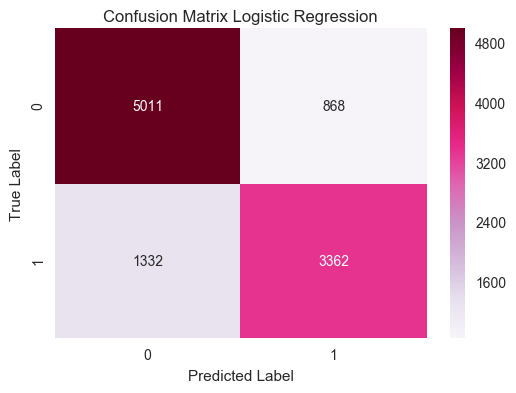

In [490]:
y_pred = clf.predict(X_test_catdog)
#print(y_pred)
print("Akurasi : ", accuracy_score(y_test_catdog, y_pred))
cm = confusion_matrix(y_test_catdog,y_pred)
#print(cm)

ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd") #-___-
ax.set_title('Confusion Matrix Logistic Regression')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()

### Soal 4.1.b (3 poin)

Gunakan `sklearn.dummy.DummyClassifier` untuk mengklasifikasikan gambar-gambar tersebut, laporkan akurasinya, dan gambarkan *heatmap* dari *confusion matrix*-nya. Mana yang hasilnya lebih baik?

In [491]:
from sklearn.dummy import DummyClassifier
clf5 = DummyClassifier(random_state=RANDOM_STATE)
%timeit -n1 clf5.fit(X_train_catdog, y_train_catdog)

1 loop, best of 3: 24.6 ms per loop


Akurasi :  0.505438380781


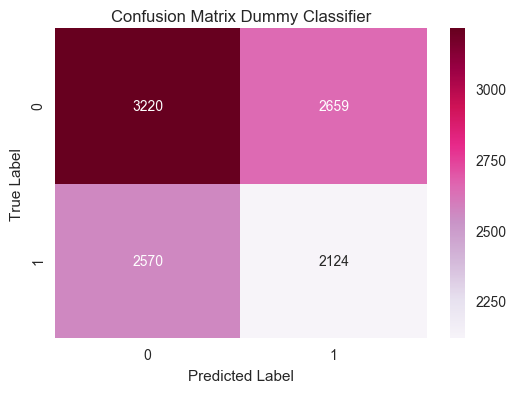

In [492]:
y_pred = clf5.predict(X_test_catdog)
#print(y_pred)
print("Akurasi : ", accuracy_score(y_test_catdog, y_pred))
cm = confusion_matrix(y_test_catdog,y_pred)
#print(cm)

ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd") #-___-
ax.set_title('Confusion Matrix Dummy Classifier')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()

*Yang hasilnya lebih baik adalah Regresi Logistik dengan akurasi 0.792 dibandingkan Dummy Classifier yang akurasi nya 0.505. Dari confusion matrix nya juga terlihat lebih baik Regresi Logistik, karena angka false negative dan false positive terhadap true positive dan true negative nya cukup jauh berbeda dibandingkan dengan Dummy Classifier yang hampir- hampir mirip angkanya*

### Soal 4.2.a (5 poin)

Anda mungkin akan menemukan bahwa hasil klasifikasi dengan regresi logistik untuk kasus **cat vs dog** akurasinya hanya mencapai sekitar 80%. Seperti yang mungkin Anda duga dari gambar yang dihasilkan pada soal 3.3, banyak kesamaan bentuk dari **cat** dan **dog** jika dibandingkan dengan **crab vs dolphin**. Untuk itu, kita akan mencoba mengklasifikasikan **crab vs dolphin** kali ini. Jadikan `'crab' = 1` dan `'dolphin' = 0`, lalu prediksi data uji dengan regresi logistik dan laporkanlah *metrics* seperti pada soal 4.1.a!

In [493]:
X_train_crabdolp = X_train_crabdolp/255.0
X_test_crabdolp = X_test_crabdolp/255.0

y_train_crabdolp[y_train_crabdolp=='crab']=1
y_train_crabdolp[y_train_crabdolp=='dolphin']=0
y_test_crabdolp[y_test_crabdolp=='crab']=1
y_test_crabdolp[y_test_crabdolp=='dolphin']=0

In [494]:
%timeit -n1 clf.fit(X_train_crabdolp, y_train_crabdolp)

1 loop, best of 3: 31.2 s per loop


Akurasi :  0.910469926806


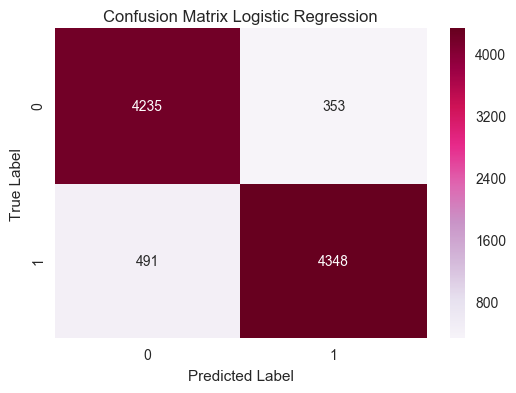

In [495]:
y_pred = clf.predict(X_test_crabdolp)
#print(y_pred)
print("Akurasi : ", accuracy_score(y_test_crabdolp, y_pred))
cm = confusion_matrix(y_test_crabdolp,y_pred)
#print(cm)

ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd") #-___-
ax.set_title('Confusion Matrix Logistic Regression')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()

### Soal 4.2.b (3 poin)

`DummyClassifier` seperti yang digunakan pada soal 4.1.b merupakan cara klasifikasi **secara acak** yang hanya memastikan bahwa proporsi kelas hasil prediksi harus sama dengan proporsi kelas saat proses `.fit()`. Hal ini biasa kita gunakan sebagai *baseline* atau standar untuk dikalahkan.

Lakukan kembali hal yang diminta pada soal 4.1.b, tetapi kali ini dengan dataset **crab vs dolphin** yang telah Anda buat.

In [507]:
%timeit -n1 clf5.fit(X_train_crabdolp, y_train_crabdolp)

The slowest run took 8.15 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 23 ms per loop


Akurasi :  0.499416569428


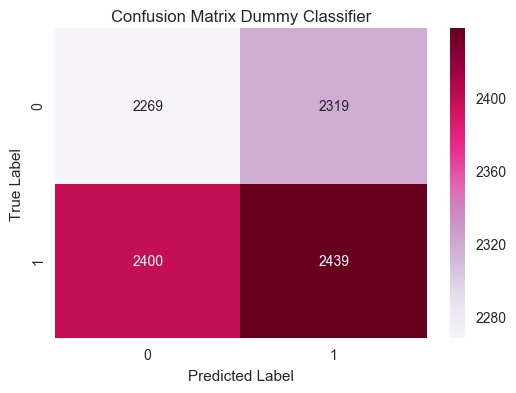

In [508]:
y_pred = clf5.predict(X_test_crabdolp)
#print(y_pred)
print("Akurasi : ", accuracy_score(y_test_crabdolp, y_pred))
cm = confusion_matrix(y_test_crabdolp,y_pred)
#print(cm)

ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd") #-___-
ax.set_title('Confusion Matrix Dummy Classifier')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()

### Soal 4.3 (2 poin)

Seharusnya, saat ini Anda masih memiliki variabel `X` dan `y` yang mengandung data dalam bentuk gabungan. Tugas Anda kali ini adalah mengubah terlebih dahulu label pada variabel `y` ke dalam angka agar dapat diproses oleh algoritma klasifikasi. Gunakan `sklearn.preprocessing.LabelEncoder` lalu simpan nilainya dalam `y_label`.

*Petunjuk: Anda dapat langsung mentransformasikannya dengan `.fit_transform()`*

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_label = le.fit_transform(y)

### Soal 4.4 (2 poin)

Bagi kembali datanya ke dalam `X_train`, `X_test`, `y_train`, `y_test` seperti pada soal 3.2, lalu bagi setiap nilai pada `X_train` dan `X_test` dengan 255.0!

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=20000,random_state=RANDOM_STATE)

X_train = X_train/255.0
X_test = X_test/255.0

### Soal 4.5 (5 poin)

Lakukan kembali klasifikasi dengan `DummyClassifier` dan regresi logistik! Perhatikan kembali akurasi dan *confusion matrix*-nya, apa yang dapat Anda lihat?

*Petunjuk: Saat membuat heatmap dengan fungsi dari seaborn, ubah parameter `xticklabels` dan `yticklabels` dengan fungsi `.inverse_transform` dari `LabelEncoder` untuk mengubah label menjadi nama hewan kembali.*

In [500]:
#REGRESI LOGISTIK
%timeit -n1 clf.fit(X_train, y_train)

1 loop, best of 3: 6min 13s per loop


Akurasi :  0.6977


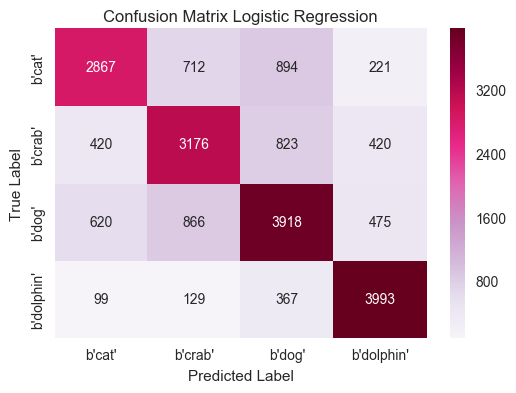

In [501]:
y_pred = clf.predict(X_test)
print("Akurasi : ", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)

ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd") #-___-
ax.set_title('Confusion Matrix Logistic Regression')
ax.set_yticklabels(le.inverse_transform([3,2,1,0]))
ax.set_xticklabels(le.inverse_transform([0,1,2,3]))
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()

In [503]:
%timeit -n1 clf5.fit(X_train, y_train)

The slowest run took 8.17 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 46.1 ms per loop


Akurasi :  0.24765


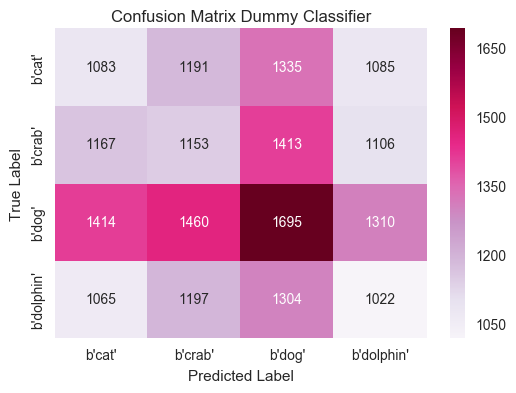

In [505]:
y_pred = clf5.predict(X_test)
#print(y_pred)
print("Akurasi : ", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
#print(cm)

ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd") #-___-
ax.set_title('Confusion Matrix Dummy Classifier')
ax.set_yticklabels(le.inverse_transform([3,2,1,0]))
ax.set_xticklabels(le.inverse_transform([0,1,2,3]))
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()

*Akurasi yang didapatkan dari Regresi Logistik mencapai 3 kali lipat akurasi Dummy Classifier. Pada confusion matrix nya juga terlihat bahwa prediksi dog dengan cat banyak menyimpangnya, Lalu dog dengan crab juga tidak jauh berbeda kesalahan prediksinya*

## 5. Klasifikasi dengan Deep Learning (10 poin)

Coba klasifikasikan data Quick Draw untuk keempat hewan dengan menggunakan pustaka dari Keras untuk *deep learning* atau *neural networks*. Jangan lupa untuk melaporkan akurasi dan *confusion matrix*-nya.

*Petunjuk: Anda mungkin perlu mengubah dimensi dari data latih dan data uji Anda menjadi $n \times d \times d \times 1$ dengan 1 dimensi terakhir adalah channel hitam-putih. Nilainya bisa menjadi 3 jika kita menggunakan channel warna RGB.*

*Anda mungkin perlu menggunakan representasi one-of-K untuk label yang digunakan. Anda dapat menggunakan `keras.utils.to_categorical` untuk melakukan hal ini. Silakan mencontoh kode untuk deep neural networks sederhana di [sini](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py) atau dengan menggunakan convolutional neural networks di [sini](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py).*

Penilaian:

1. Implementasi kode simple deep neural networks (5 poin)
2. Implementasi convolutional neural networks (3 poin)
3. Melaporkan akurasi dan membuat heatmap confusion matrix (2 poin)

In [10]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 1000
num_classes = 4
epochs = 9

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
x_train, x_test, y_train, y_test = train_test_split(X,y_label,test_size=20000,random_state=RANDOM_STATE)

if K.image_dim_ordering() == 'th':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (110974, 28, 28, 1)
110974 train samples
20000 test samples
Train on 110974 samples, validate on 20000 samples
Epoch 1/9
110974/110974 [==============================] - 1049s - loss: 0.7113 - acc: 0.7256 - val_loss: 0.4810 - val_acc: 0.8231
Epoch 2/9
110974/110974 [==============================] - 1074s - loss: 0.4925 - acc: 0.8208 - val_loss: 0.3970 - val_acc: 0.8529
Epoch 3/9
110974/110974 [==============================] - 1069s - loss: 0.4282 - acc: 0.8451 - val_loss: 0.3588 - val_acc: 0.8678
Epoch 4/9
110974/110974 [==============================] - 1055s - loss: 0.3918 - acc: 0.8576 - val_loss: 0.3501 - val_acc: 0.8709
Epoch 5/9
110974/110974 [==============================] - 1046s - loss: 0.3691 - acc: 0.8669 - val_loss: 0.3322 - val_acc: 0.8775
Epoch 6/9
110974/110974 [==============================] - 1045s - loss: 0.3491 - acc: 0.8739 - val_loss: 0.3068 - val_acc: 0.8879
Epoch 7/9
110974/110974 [==============================] - 1047s - loss: 0.3295 - acc: 0

20000/20000 [==============================] - 56s    


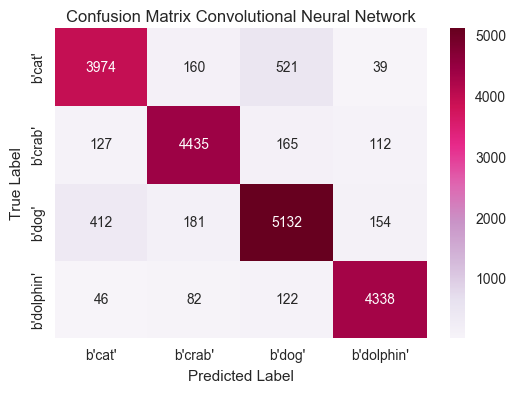

In [16]:
y_pred = model.predict_classes(x_test)
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
#print(cm)

ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd") #-___-
ax.set_title('Confusion Matrix Convolutional Neural Network')
ax.set_yticklabels(le.inverse_transform([3,2,1,0]))
ax.set_xticklabels(le.inverse_transform([0,1,2,3]))
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()